# Session 6: Visualization

Now that you're getting results you care about from texts that interest you, you may want to be able to express those results in something other than a spreadsheet. There are many tools of visualization in Python, some much more complicated than others. Pandas, along with a helper library called Seaborn, makes visualization of certain tried and true graphs quick and easy.

In [46]:
from lxml import etree
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

plt.style.use('ggplot') # This makes our plots look nicer

In [47]:
# First let's get some data, wordcounts from FQ

with open('data/fq_ma.xml', 'r') as xmlfile: # Open the file
    fq_text = xmlfile.read() # Read the file as plaintext
    fq_xml = etree.fromstring(fq_text) # Convert plaintext to an etree object
    
all_words = [word.text for word in fq_xml.findall('.//{*}w')]
counted_words = Counter(all_words)

print(counted_words)

Counter({'the': 6471, 'to': 6348, 'and': 5265, 'And': 5084, 'of': 4904, 'his': 4510, 'her': 4056, 'that': 3915, 'he': 3769, 'in': 3458, 'did': 3175, 'with': 2972, 'him': 2693, 'all': 2356, 'she': 1985, 'That': 1977, 'a': 1972, 'was': 1896, 'But': 1807, 'which': 1714, 'The': 1532, 'as': 1463, 'so': 1372, 'for': 1364, 'it': 1285, 'they': 1257, 'their': 1235, 'them': 1134, 'To': 1109, 'I': 1073, 'by': 1034, 'from': 1001, 'not': 964, 'For': 963, 'had': 944, 'on': 912, 'be': 877, 'when': 833, 'is': 782, 'With': 773, 'this': 760, 'So': 723, 'He': 717, 'were': 715, 'Which': 707, 'at': 696, 'Of': 669, 'great': 626, 'faire': 616, 'In': 612, 'then': 590, 'Yet': 574, 'well': 574, 'selfe': 565, 'or': 559, 'my': 546, 'doth': 542, 'gan': 541, 'now': 539, 'more': 530, 'but': 524, 'loue': 523, 'forth': 518, 'haue': 517, 'long': 516, 'might': 515, 'vnto': 508, 'As': 507, 'there': 506, 'through': 488, 'His': 487, 'Ne': 477, 'knight': 475, 'like': 473, 'would': 460, 'Then': 455, 'many': 439, 'me': 439, '

## Let's begin by creating a classic graph

How common are certain wordcounts over others? How many words appear just one time? How many words appear twice, and so on?

In [63]:
# Now we need to get this information into a pandas Series
# A Series is like a single column of a dataframe

# For pandas to take this, we have to split up keys and values
count_series = pd.Series(list(counted_words.values()), index=list(counted_words.keys()))
count_series

THE              27
FAERIE            8
QVEENE            9
Disposed          1
into            245
twelue           10
bookes           11
Fashioning        2
XII               7
Morall            1
vertues          32
ANCHORA           2
SPEI              2
LONDON            1
Printed           1
for            1364
VVilliam          2
Ponsonbie         1
1596.             2
TO                2
MOST              2
HIGH              1
MIGHTIE           1
And            5084
MAGNIFICENT       1
EMPRESSE          1
RENOVVMED         1
FOR               1
PIETIE            1
VERTVE            1
               ... 
rampt             1
Putting           1
bullocke          1
rere              1
hell-borne        1
Hydra             1
labourd           1
interlacing       1
vnworthily        1
shrincke          1
muzzell           1
mured             1
defaming          1
euē               1
Tirynthian        1
captyue           1
leade             1
tamed             1
endammadge        1


In [64]:
# We use the special value_counts() method in pandas to answer our question
# Value counts must be run on a single Series, in this case our df column
# Access a column like you would a dictionary value

count_series.value_counts()

1       9238
2       2781
3       1392
4        850
5        648
6        498
7        394
8        302
9        270
10       244
11       191
12       150
13       138
14       132
17       116
15       115
16        95
18        84
19        68
20        65
22        60
21        59
23        58
24        47
26        47
30        42
32        40
25        37
34        33
28        32
        ... 
220        1
1972       1
1364       1
964        1
2693       1
612        1
6471       1
276        1
213        1
507        1
261        1
2356       1
123        1
139        1
155        1
203        1
118        1
86         1
283        1
299        1
331        1
475        1
1285       1
1109       1
773        1
565        1
517        1
437        1
325        1
1807       1
Length: 327, dtype: int64

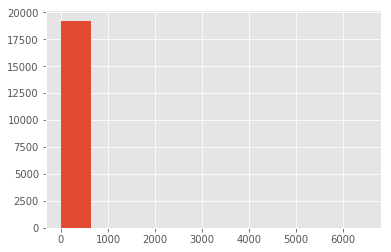

In [65]:
# We can see that there are over 9000 words that appear just once
# But on the higher end, there's often only one word at that frequency

# We can graph this as a histogram, which handles value counts for us
# Histograms show us the *distribution* of our data

count_series.hist()

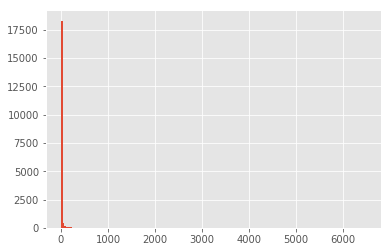

In [66]:
# This is a bit hard to read
# Let's make it easier by showing fewer groupings of data, the number of "bins"

count_series.hist(bins=200)

## This data is, unsurprisingly, a very good example of a power law distribution

This doesn't really tell us much interesting about the FQ, but it's a good illustration of how graphing works at a very basic level. It also confirms that the FQ is, in fact, a good example of how language works.

Seaborn gives us an even better way of looking at data distributions.

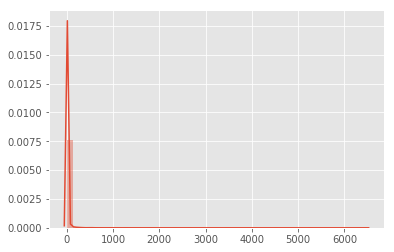

In [67]:
sns.distplot(count_series)

This is essentially a histogram with a line graph drawn over it, to show the distribution of the data more clearly. You can see that this follows the classic Zipf's Law curve. (Ignore that first spike: 0 words appear 0 times.)

## Now let's do something more complicated

I'd like to use the FQ tf-idf data, but I don't want to write all that code again. I can save the dataframe I made in the Session 5 notebook using the to_pickle() method. I wrote:

```
df.to_pickle('data/tfidf.pkl')
```

I can retrieve it easily:

In [53]:
tfidf = pd.read_pickle('data/tfidf.pkl')
tfidf

,1,2,3,4,5,6
aback,0.000000,1.559616,0.000000,6.238463,0.000000,3.119232
aband,0.000000,2.252763,0.000000,0.000000,0.000000,0.000000
abandoned,1.559616,0.000000,1.559616,0.000000,0.000000,1.559616
abandoning,0.000000,0.000000,0.000000,0.000000,2.252763,0.000000
abase,0.000000,6.238463,0.000000,1.559616,0.000000,4.678847
abash,0.000000,1.847298,0.000000,0.000000,1.847298,0.000000
abashment,0.000000,0.000000,4.505526,0.000000,0.000000,0.000000
abated,0.000000,2.252763,0.000000,0.000000,0.000000,0.000000
abating,0.000000,0.000000,0.000000,0.000000,0.000000,2.252763
abear,0.000000,0.000000,0.000000,0.000000,1.847298,1.847298


In [54]:
# It's easy to take a look at which books are correlated by tfidf scores

tfidf.corr()

,1,2,3,4,5,6
1,1.000000,-0.006255,-0.028782,-0.053239,-0.036187,-0.040315
2,-0.006255,1.000000,0.028906,-0.056950,-0.030603,-0.040403
3,-0.028782,0.028906,1.000000,0.219467,0.040104,-0.033007
4,-0.053239,-0.056950,0.219467,1.000000,0.056922,-0.026926
5,-0.036187,-0.030603,0.040104,0.056922,1.000000,-0.020031
6,-0.040315,-0.040403,-0.033007,-0.026926,-0.020031,1.000000


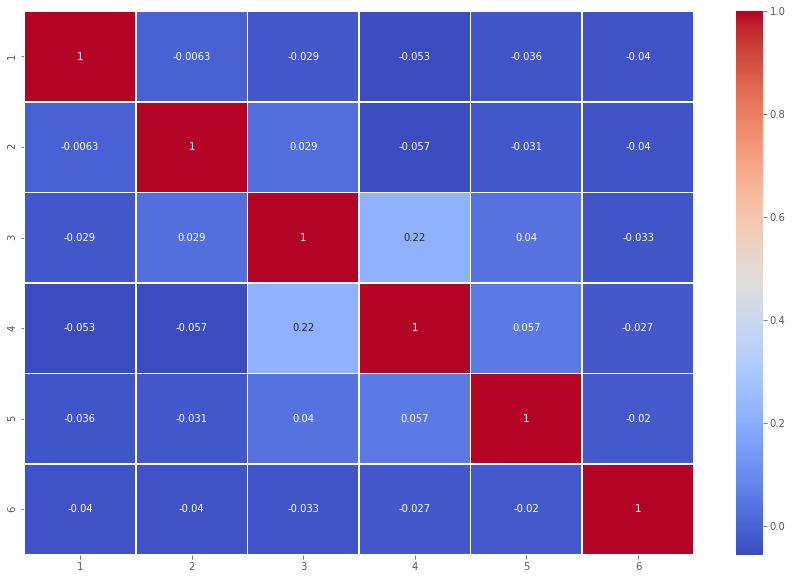

In [55]:
# We can look at that more nicely as a heatmap.

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(tfidf.corr(),annot=True,cmap='coolwarm',linewidths=.5)

None of these books are all *that* correlated by tfidf scores (which makes sense since it's a measure of lexical uniqueness), but Books 3 and 4 are the most similar.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc36eb4d860>,
      dtype=object)

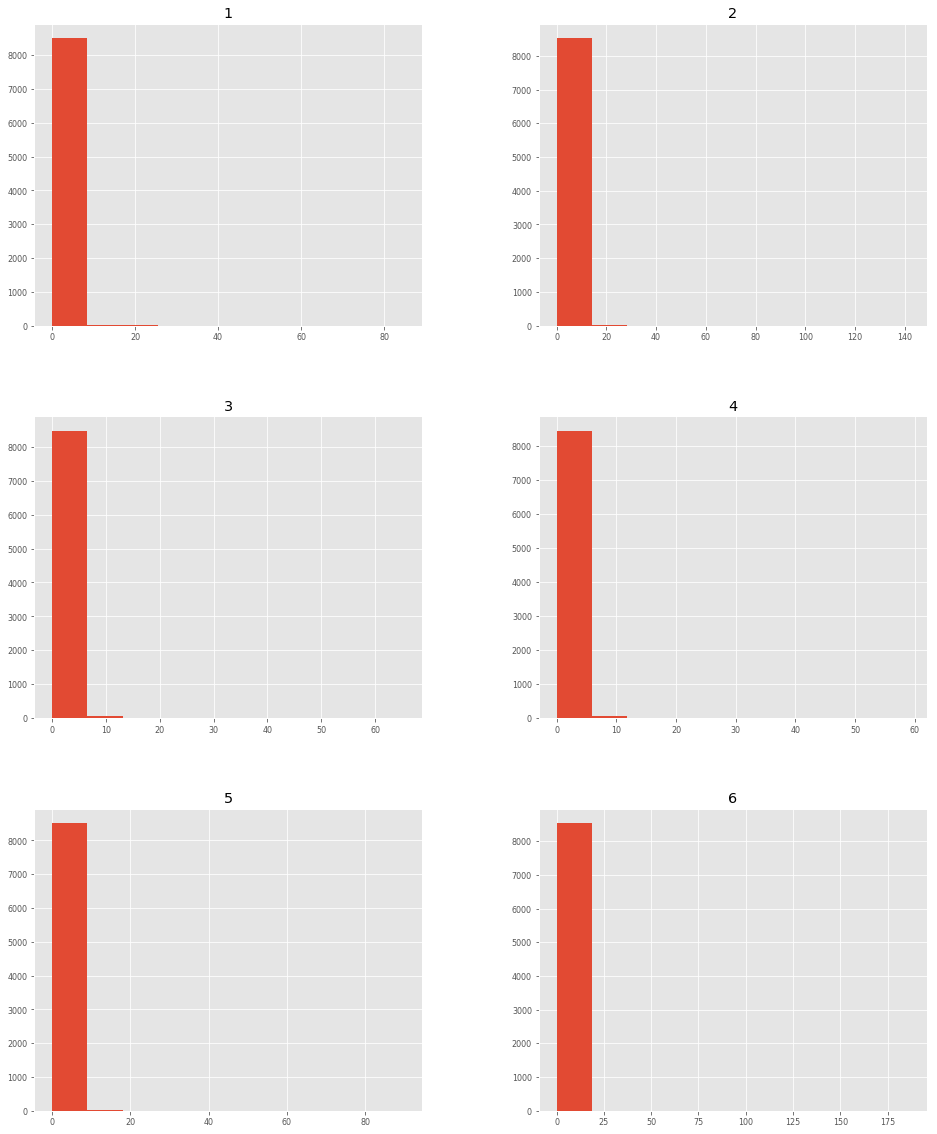

In [56]:
# How are tfidf scores distributed across the different books?

tfidf.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

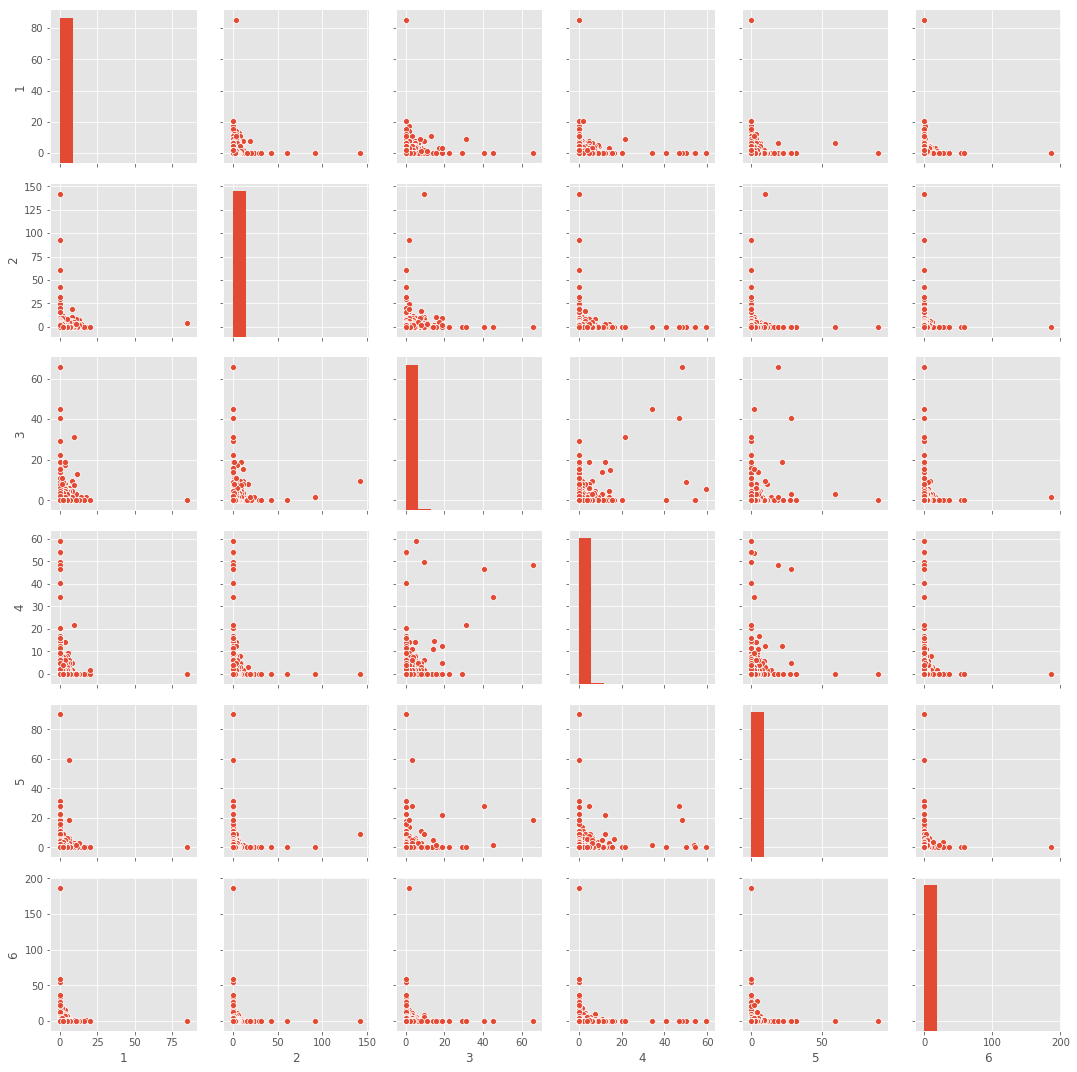

In [58]:
# And as an analog to the heatmap, we can look at scatterplots for 
# tfidf scores, matching one book against another at a time

sns.pairplot(tfidf)

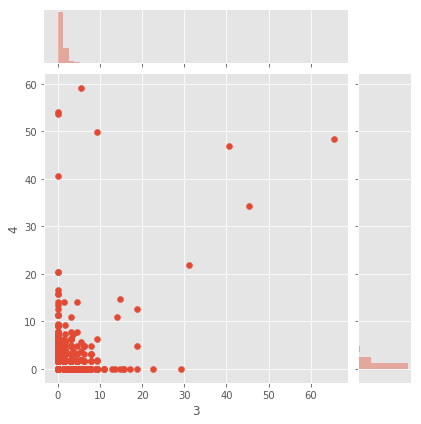

In [60]:
# We can also combine distributions and scatterplots, one pair at a time

sns.jointplot(data=tfidf, x=3, y=4)

We can see from this graph that there are plenty of words in books 3 and 4 with roughly equally low tf-idf scores.

There are also a fair number that have high tf-idf in one and 0 in another, which makes perfect sense.

Interestingly, there are few words with high tf-idf scores in both books. Are these words that are unique to these two books? Character names, perhaps?